## No noise

First, we will just experiment with no noise to make sure we construct an accurate simulation of the original results

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math

m = 5 #Number of columns 
r = 2 #Dimension of U*

U = np.random.rand(m,r) #Random (true) subspace
#U = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Example true space

print("True space \n", U)

True space 
 [[0.96810016 0.61070711]
 [0.14947501 0.0776449 ]
 [0.27139367 0.03817237]
 [0.19900981 0.4878122 ]
 [0.06785263 0.35751246]]


##### Note:

In our experiments, we will take $W$ to be either of the form:

$$
\begin{matrix}
1 & 0 & ... & 0 \\
1 & 1 & ... & 0 \\
1 & 1 & ... & 0 \\
... & ... & ... & ... \\
0 & 0 & ... & 1 \\
\end{matrix}
$$

with each column having r+1 $1$s starting from the main diagonal, or 

$$
\begin{matrix}
1 & 1 & ... & 1 \\
1 & 1 & ... & 1 \\
1 & 1 & ... & 1 \\
... & ... & ... & ... \\
1 & 1 & ... & 1 \\
1 & 0 & ... & 0 \\
0 & 1 & ... & 0 \\
... & ... & ... & ... \\
0 & 0 & ... & 1 \\
\end{matrix}
$$

with a block of r 1's in the first r rows and an identity matrix at the bottom.

We could choose any $W$ satisfying our assumptions. This was taken because of ease of generalization in the code.

In [2]:
#Define the binary matrix W

W = np.zeros((m,m-r))

#Uncomment for the first type of W matrix
"""
for i in range(W.shape[1]):
    temp = 0
    while temp!=r+1:
        W[temp+i][i] = 1
        temp+=1
"""

#Uncomment for the second type of W matrix

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i < r:
            W[i][j] = 1
        else:
            if i-r == j:
                W[i][j] = 1

        
W_T = np.transpose(W)

print("Binary matrix \n", W)

Binary matrix 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3]:
#Computing the projections of S onto canonical coordinates

U_proj = np.array(np.hstack(([[U[j,:] for j in range(np.shape(U)[0]) if W_T[i,j] == 1] for i in range(W_T.shape[0])])))

print("Matrix of projections of S onto lower dimensions \n", U_proj)

Matrix of projections of S onto lower dimensions 
 [[0.56758765 0.30121422 0.56758765 0.30121422 0.56758765 0.30121422]
 [0.41655079 0.54940787 0.41655079 0.54940787 0.41655079 0.54940787]
 [0.37182751 0.11526982 0.39130949 0.02155973 0.45986104 0.42495246]]


In [4]:
#Computing the nullspaces of the projections

from scipy.linalg import null_space

A_temp = np.array(np.hstack(([[null_space(U_proj.T[i:i+r, :])[j,:] for j in range(U_proj.T.shape[1])] for i in range(0, U_proj.T.shape[0], r)])))

print("Matrix of basis vectors of the nullspace of projections \n", A_temp)


Matrix of basis vectors of the nullspace of projections 
 [[-0.63105462 -0.69315591 -0.33493711]
 [ 0.18807759  0.35541721 -0.45469428]
 [ 0.75259344  0.62706738  0.8252698 ]]


In [5]:
#Creating the matrix A whose null space will be the true subspace 
#And computing its singular values

A = np.array(W, dtype = float)

for j in range(A.shape[1]):
    c = 0
    for i in range(A.shape[0]):
        if A[i,j] == 1:
            A[i,j] = A_temp[c, j]
            c+=1
print("Matrix whose kernel will be our guess \n", A)

Sig = np.linalg.svd(A)[1]

print("Singular values \n", Sig)

Matrix whose kernel will be our guess 
 [[-0.63105462 -0.69315591 -0.33493711]
 [ 0.18807759  0.35541721 -0.45469428]
 [ 0.75259344  0.          0.        ]
 [ 0.          0.62706738  0.        ]
 [ 0.          0.          0.8252698 ]]
Singular values 
 [1.24099729 0.9835247  0.70185818]


In [6]:
#Finding kernel space of A

U_test = null_space(A.T)

print("Basis of guessed space \n", U_test)

Basis of guessed space 
 [[ 0.31762712  0.49785865]
 [-0.53372149  0.59478389]
 [ 0.39971265  0.26881776]
 [ 0.65361225  0.21321032]
 [-0.16515205  0.52976151]]


In [7]:
# Testing for whether the span of ker(A) is the same as column space of U - i.e. the true space
# We test this by looking at the projection matrices 
# Error estimated with the ||P_true - P_test||_F, the frobenius norm of the difference in Projection matrices

P_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))

P_true = np.dot(U,np.dot(np.linalg.inv(np.dot(U.T,U)), U.T))

error = (1/math.sqrt(2))*np.linalg.norm(P_true - P_test, 'fro') 

print ("True projection", P_true)
print ("Guessed projection", P_test)

print ("Error", error)

True projection [[ 0.34875023  0.12659389  0.26079282  0.31375358  0.21128958]
 [ 0.12659389  0.63862651 -0.05344676 -0.22203285  0.40323881]
 [ 0.26079282 -0.05344676  0.23203319  0.3185718   0.07639594]
 [ 0.31375358 -0.22203285  0.3185718   0.47266762  0.00500522]
 [ 0.21128958  0.40323881  0.07639594  0.00500522  0.30792245]]
Guessed projection [[ 0.34875023  0.12659389  0.26079282  0.31375358  0.21128958]
 [ 0.12659389  0.63862651 -0.05344676 -0.22203285  0.40323881]
 [ 0.26079282 -0.05344676  0.23203319  0.3185718   0.07639594]
 [ 0.31375358 -0.22203285  0.3185718   0.47266762  0.00500522]
 [ 0.21128958  0.40323881  0.07639594  0.00500522  0.30792245]]
Error 6.029162398354541e-16


## With noise 

Now we will perform the same experiment, but we will add noise into the mix and see how the noise translates through every step.

In [165]:
m = 7 #Number of columns 
r = 3 #Dimension of U*


U = np.random.rand(m,r) #Random (true) subspace

#Uncomment the left out for an example true space
#m = 5
#r = 2
#U = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) 

print("True space \n", U)

True space 
 [[0.94764319 0.5746368  0.95241396]
 [0.06051182 0.40855429 0.3486234 ]
 [0.37908835 0.09466664 0.47364235]
 [0.11485109 0.13376866 0.57138045]
 [0.39693393 0.77073168 0.1184008 ]
 [0.78233693 0.20947833 0.17314089]
 [0.90004329 0.10846506 0.24671222]]


In [166]:
#Define the binary matrix W

W = np.zeros((m,m-r))

#Uncomment for the first type of W matrix
"""
for i in range(W.shape[1]):
    temp = 0
    while temp!=r+1:
        W[temp+i][i] = 1
        temp+=1
"""

#Uncomment for the second type of W matrix

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i < r:
            W[i][j] = 1
        else:
            if i-r == j:
                W[i][j] = 1

        
W_T = np.transpose(W)

print("Binary matrix \n", W)

Binary matrix 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [167]:
# Computing the projections of S onto canonical coordinates

# No noise Version

U_proj = np.array(np.hstack(([[U[j,:] for j in range(U.shape[0]) if W_T[i,j] == 1] for i in range(W_T.shape[0])])))

# Creating the noisy versions

mu = 0 # mean
sigma = 1e-3 # standard deviation

#Adding noise from a Gaussian distribution

Z_proj = np.random.normal(mu, sigma, (U_proj.shape[0], U_proj.shape[1]))
V_proj = U_proj + Z_proj


print("Projections of U onto lower dimensions w/o noise \n", U_proj)
print("Projections of U onto lower dimensions w/ noise \n", V_proj)

Projections of U onto lower dimensions w/o noise 
 [[0.94764319 0.5746368  0.95241396 0.94764319 0.5746368  0.95241396
  0.94764319 0.5746368  0.95241396 0.94764319 0.5746368  0.95241396]
 [0.06051182 0.40855429 0.3486234  0.06051182 0.40855429 0.3486234
  0.06051182 0.40855429 0.3486234  0.06051182 0.40855429 0.3486234 ]
 [0.37908835 0.09466664 0.47364235 0.37908835 0.09466664 0.47364235
  0.37908835 0.09466664 0.47364235 0.37908835 0.09466664 0.47364235]
 [0.11485109 0.13376866 0.57138045 0.39693393 0.77073168 0.1184008
  0.78233693 0.20947833 0.17314089 0.90004329 0.10846506 0.24671222]]
Projections of U onto lower dimensions w/ noise 
 [[0.94880107 0.57424319 0.95181663 0.94496327 0.57619774 0.95286748
  0.94900271 0.57299082 0.95255224 0.94730891 0.57588144 0.95185274]
 [0.06130669 0.41034839 0.34850134 0.06135981 0.40884142 0.34804923
  0.06074404 0.4079974  0.34726941 0.06145015 0.40798082 0.34749922]
 [0.3785795  0.09504675 0.47302948 0.37940207 0.09547972 0.47371628
  0.378201

In [168]:
# Finding the spectral norm of the largest noise matrix to get epsilon

epsilon = 0

for j in range(0, Z_proj.shape[1], r):
    lam = np.amax(np.linalg.svd(Z_proj[:, j:j+r])[1])
    epsilon = np.amax([epsilon, lam])
    print(Z_proj[:, j:j+r].shape)
print(epsilon)

(4, 3)
(4, 3)
(4, 3)
(4, 3)
0.003538934576822746


In [169]:
# Computing the nullspaces of the projections

# No noise version

A_temp = np.array(np.hstack(([[null_space(U_proj.T[i:i+r, :])[j,:] for j in range(U_proj.T.shape[1])] for i in range(0, U_proj.T.shape[0], r)])))


# Noisy version

B_temp = np.array(np.hstack(([[null_space(V_proj.T[i:i+r, :])[j,:] for j in range(V_proj.T.shape[1])] for i in range(0, V_proj.T.shape[0], r)])))




print("Basis vectors of the nullspace of projections w/o noise \n", A_temp)
print("Basis vectors of the nullspace of projections w/ noise \n", B_temp)

Basis vectors of the nullspace of projections w/o noise 
 [[ 0.29485012 -0.44476073 -0.53966633 -0.55022967]
 [-0.35671208 -0.03743679  0.45252079  0.56778401]
 [-0.79743252  0.86045859  0.63914788  0.52090421]
 [ 0.38719668  0.24575883  0.30899059  0.32175679]]
Basis vectors of the nullspace of projections w/ noise 
 [[ 0.29501028 -0.44572017 -0.53884255 -0.55007742]
 [-0.35281456 -0.03446822  0.44862994  0.57221887]
 [-0.79999912  0.86017763  0.64316689  0.51574783]
 [ 0.38534691  0.2454382   0.30776003  0.32246638]]


In [170]:
#Creating the matrix A whose null space will be the true subspace

# No noise version

A = np.array(W, dtype = float) 

for j in range(A.shape[1]): 
    c = 0
    for i in range(A.shape[0]):
        if A[i,j] == 1:
            A[i,j] = A_temp[c, j]
            c+=1
            
# Noisy version
            
B = np.array(W, dtype = float) 

for j in range(B.shape[1]):
    c = 0
    for i in range(B.shape[0]):
        if B[i,j] == 1:
            B[i,j] = B_temp[c, j]
            c+=1       

            
print("Matrix whose kernel will be our guess w/o noise \n", A)
print("Matrix whose kernel will be our guess w/ noise \n", B)

Matrix whose kernel will be our guess w/o noise 
 [[ 0.29485012 -0.44476073 -0.53966633 -0.55022967]
 [-0.35671208 -0.03743679  0.45252079  0.56778401]
 [-0.79743252  0.86045859  0.63914788  0.52090421]
 [ 0.38719668  0.          0.          0.        ]
 [ 0.          0.24575883  0.          0.        ]
 [ 0.          0.          0.30899059  0.        ]
 [ 0.          0.          0.          0.32175679]]
Matrix whose kernel will be our guess w/ noise 
 [[ 0.29501028 -0.44572017 -0.53884255 -0.55007742]
 [-0.35281456 -0.03446822  0.44862994  0.57221887]
 [-0.79999912  0.86017763  0.64316689  0.51574783]
 [ 0.38534691  0.          0.          0.        ]
 [ 0.          0.2454382   0.          0.        ]
 [ 0.          0.          0.30776003  0.        ]
 [ 0.          0.          0.          0.32246638]]


In [171]:
#Computing the singular values of the projected S matrix, noisy projected S matrix, and noisy A matrix.

Sig_V_proj = np.array(np.hstack(([np.linalg.svd(V_proj.T[i:i+r, :])[1] for i in range(0, V_proj.T.shape[0], r)])))
Sig_ker = np.amin(np.linalg.svd(B)[1])

delta = (np.sum(np.power((Sig_V_proj-epsilon),2)))**(0.5)

print("Min Kernel Matrix Singular Value", Sig_ker)
print("Sum of Data Singular Values", delta)

Min Kernel Matrix Singular Value 0.3106912794302182
Sum of Data Singular Values 3.719441551818862


In [172]:
#Finding kernel space of A

U_test = null_space(A.T) # No noise
V_test = null_space(B.T) # With noise

print("Basis of guessed space w/o noise \n", U_test)
print("Basis of guessed space w/ noise \n", V_test)

Basis of guessed space w/o noise 
 [[ 0.1011282   0.70706183 -0.17792306]
 [ 0.31495123  0.12695228 -0.39132997]
 [-0.19027696  0.36615558 -0.11664206]
 [-0.17873033  0.33262813 -0.46525622]
 [ 0.89719691  0.01694469  0.02678373]
 [ 0.10896325  0.29159902  0.50363149]
 [-0.07479087  0.39232409  0.5751291 ]]
Basis of guessed space w/ noise 
 [[ 0.09826608  0.70745919 -0.17663286]
 [ 0.31269236  0.1295553  -0.39369119]
 [-0.19184526  0.36515515 -0.1136892 ]
 [-0.18721606  0.33508782 -0.46125383]
 [ 0.89471861  0.0232078   0.02238546]
 [ 0.11715398  0.28668775  0.50222729]
 [-0.08041377  0.3928948   0.57913245]]


In [173]:
# Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
# We test this by looking at the projection matrices 
# Error estimated with the ||P_true - P_test||_F, the frobenius norm of the difference in Projection matrices

P_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))
P_test_noise = np.dot(V_test,np.dot(np.linalg.inv(np.dot(V_test.T,V_test)), V_test.T))
P_true = np.dot(U,np.dot(np.linalg.inv(np.dot(U.T,U)), U.T))

error = (1/math.sqrt(2))*np.linalg.norm(P_true - P_test, 'fro') 
error_noise = (1/math.sqrt(2))*np.linalg.norm(P_true - P_test_noise, 'fro') 

bound = ((Sig_ker*delta)/(epsilon*math.sqrt(2*r))-1)**(-1)

#print ("True projection", P_true)
#print ("Guessed projection w/o noise", P_test)
#print ("Guessed projection w/ noise", P_test_noise)

print ("Error w/o noise", error)
print ("Error w/ noise", error_noise)
print ("Estimated bound", bound)

Error w/o noise 6.416226014371095e-16
Error w/ noise 0.012771358104908688
Estimated bound 0.0075580793491331925


## Experiments

In [174]:
def Errors(m_, r_, U_, W_, sigma_):
    
    ##############################################################################################

    # Step 0.0: Computing the projections of S onto canonical coordinates and adding noise

    # No noise Version

    U_proj = np.array(np.hstack(([[U_[j,:] for j in range(U_.shape[0]) if W_.T[i,j] == 1] for i in range(W_.T.shape[0])])))


    # Creating the noisy versions
    
    rows_proj = U_proj.shape[0]
    cols_proj = U_proj.shape[1]

    #Adding noise from a Gaussian distribution to projection (Option 1)
    
    Z_proj = np.random.normal(0, sigma_, (rows_proj,cols_proj))
    V_proj = U_proj + Z_proj
    
    ##############################################################################################
    
    # Step 0.1: computing epsilon by computing the largest spectral norm of all the noise matrices
    
    
    # Finding the spectral norm of the largest noise matrix to get epsilon

    epsilon = 0

    for j in range(0, Z_proj.shape[1], r):
        lam = np.amax(np.linalg.svd(Z_proj[:, j:j+r])[1])
        epsilon = np.amax([epsilon, lam])
        
    
    ##############################################################################################


    # Step 1: Computing the nullspaces of the projections

    # No noise version

    A_temp = np.array(np.hstack(([[null_space(U_proj.T[i:i+r_, :])[j,:] for j in range(U_proj.T.shape[1])] for i in range(0, U_proj.T.shape[0], r_)])))


    # Noisy version

    B_temp = np.array(np.hstack(([[null_space(V_proj.T[i:i+r_, :])[j,:] for j in range(V_proj.T.shape[1])] for i in range(0, V_proj.T.shape[0], r_)])))

    
    #We could also add noise from a Gaussian distribution to these nullspaces instead of the projected 
    #coordinates (Option 2)
    #Uncomment the following line for that: 
    
    #A_temp_noise = A_temp + np.random.normal(0, sigma, (A_temp.shape[0],A_temp.shape[1]))*lam_
    
    ##############################################################################################
     
    
    #Step 2: Creating the matrix A whose null space will be the true subspace

    # No noise version

    A_ = np.array(W_, dtype = float) 

    for j in range(A_.shape[1]):
        c = 0
        for i in range(A_.shape[0]):
            if A_[i,j] == 1:
                A_[i,j] = A_temp[c, j]
                c+=1

    # Noisy version

    B_ = np.array(W_, dtype = float) 

    for j in range(B_.shape[1]):
        c = 0
        for i in range(B_.shape[0]):
            if B_[i,j] == 1:
                B_[i,j] = B_temp[c, j]
                c+=1       

    error_A = np.linalg.norm(A_-B_, 'fro')
    
    ##############################################################################################
    
    
    #Step 3: Finding kernel space of A

    U_test = null_space(A_.T) # No noise
    V_test = null_space(B_.T) # With noise

    
    error_U_test = np.linalg.norm(U_test - V_test, 'fro')
    
    ##############################################################################################
    
    #Final Step: Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
    # We test this by looking at the projection matrices 
    # Error estimated with the ||Proj_true - Proj_test||_F, the frobenius norm of the difference in Projection matrices

    Proj_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))
    Proj_test_noise = np.dot(V_test,np.dot(np.linalg.inv(np.dot(V_test.T,V_test)), V_test.T))
    Proj_true = np.dot(U_,np.dot(np.linalg.inv(np.dot(U_.T,U_)), U_.T))

    error_noiseless_test = (1/math.sqrt(2))*np.linalg.norm(Proj_true - Proj_test, 'fro') 
    error_noisy_test = (1/math.sqrt(2))*np.linalg.norm(Proj_true - Proj_test_noise, 'fro') 
    
    
    ##############################################################################################
    
    #Computing the singular values of the projected U matrix, noisy projected U matrix, and noisy A matrix.

    Sig_V_proj = np.array(np.hstack(([np.linalg.svd(V_proj.T[i:i+r_, :])[1] for i in range(0, V_proj.T.shape[0], r_)])))
    Sig_ker = np.amin(np.linalg.svd(B_)[1])

    delta = (np.sum(np.power((Sig_V_proj-epsilon),2)))**(0.5)
    
    bound =bound = (((Sig_ker*delta)/(epsilon*math.sqrt(2*r)))-1)**(-1)
    
    return error_A, error_U_test, error_noiseless_test, error_noisy_test, bound, delta, Sig_ker
             


## Experiment 1: Increasing noise level, keeping dimensions constant

In [175]:
m = 10 #Number of columns 
r = 7 #Dimension of U

U = np.random.rand(m,r) #Random (true) subspace
#U = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Uncomment the left out for an example true space

W = np.zeros((m,m-r))

#Uncomment for the first type of W matrix
"""
for i in range(W.shape[1]):
    temp = 0
    while temp!=r+1:
        W[temp+i][i] = 1
        temp+=1
"""

#Uncomment for the second type of W matrix

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i < r:
            W[i][j] = 1
        else:
            if i-r == j:
                W[i][j] = 1

        
W_T = np.transpose(W)

print("Binary matrix \n", W)

low_b = 1e-8 #Lower bound of noise
upper_b = 1e-2 #Upper bound of noise
num = 10000 # Number of experiments

sigma_vec = np.logspace(-8,-2,num)

Binary matrix 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [176]:
err_A = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_noiseless_test = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noisy_test = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds = np.empty(num, dtype = float) #Stores the error bounds for each experiment
delta_vec = np.empty(num, dtype = float) #Stores the values of delta (i.e. sum of singular values - epsilon)
Sig_kernel = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for sigma in sigma_vec:
    err_A[c], err_U_test[c], err_noiseless_test[c], err_noisy_test[c], bounds[c], delta_vec[c], Sig_kernel[c] = Errors(m,r,U,W,sigma)
    c+=1


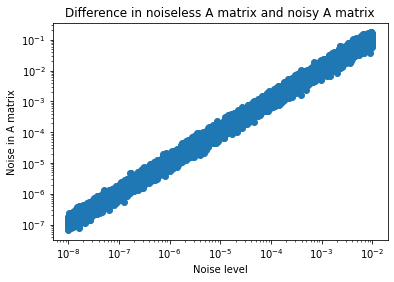

In [177]:
plt.scatter(sigma_vec,err_A)
plt.title("Difference in noiseless A matrix and noisy A matrix")
plt.xlabel("Noise level")
plt.ylabel("Noise in A matrix")
plt.xscale('log')
plt.yscale('log')
plt.show()

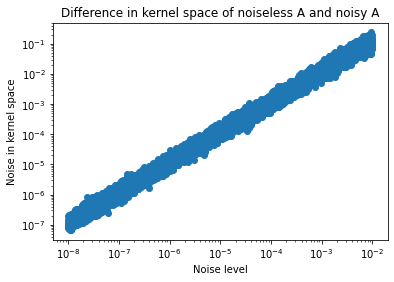

In [178]:
plt.scatter(sigma_vec, err_U_test)
plt.title("Difference in kernel space of noiseless A and noisy A")
plt.xlabel("Noise level")
plt.ylabel("Noise in kernel space")
plt.xscale('log')
plt.yscale('log')
#plt.plot(x,y,color = 'red')
plt.show()

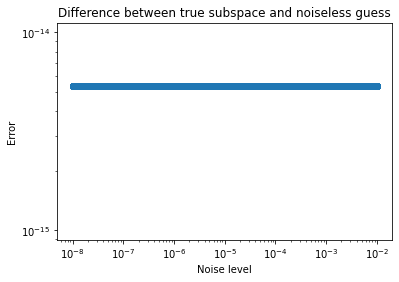

In [179]:
plt.scatter(sigma_vec, err_noiseless_test)
plt.title("Difference between true subspace and noiseless guess")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.show()

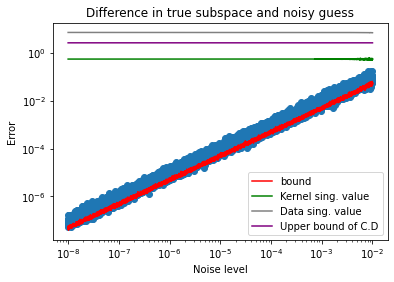

In [180]:
plt.scatter(sigma_vec, err_noisy_test)
plt.title("Difference in true subspace and noisy guess")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.plot(sigma_vec,bounds,color = 'red', label = 'bound')
plt.plot(sigma_vec,Sig_kernel, color = 'green', label = 'Kernel sing. value')
plt.plot(sigma_vec,delta_vec, color = 'grey', label = 'Data sing. value')
plt.plot(sigma_vec,np.full((num,),np.sqrt(r),dtype = float), color = 'purple', label = 'Upper bound of C.D')
plt.legend()
plt.show()

## Experiment 2: Increasing ambient dimension m, keeping noise level and subspace dimension constant

In [162]:
num = 1000 # Number of experiments
m_vec = np.random.randint(10,200, num) 
m_vec = np.sort(m_vec)
r = 7 #Dimension of U
sigma = 1e-2 #Noise level / standard deviation of noise

In [163]:
err_A = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_noiseless_test = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noisy_test = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds = np.empty(num, dtype = float) #Stores the error bounds for each experiment
delta_vec = np.empty(num, dtype = float) #Stores the minimum singular values of U or V for each experiment
Sig_kernel = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for m_ in m_vec:
    U = np.random.rand(m_,r)
    
    W = np.zeros((m_,m_-r))

    #Uncomment for the first type of W matrix
    """
    for i in range(W.shape[1]):
        temp = 0
        while temp!=r+1:
            W[temp+i][i] = 1
            temp+=1
    """

    #Uncomment for the second type of W matrix

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if i < r:
                W[i][j] = 1
            else:
                if i-r == j:
                    W[i][j] = 1
    

    err_A[c], err_U_test[c], err_noiseless_test[c], err_noisy_test[c], bounds[c], delta_vec[c], Sig_kernel[c] = Errors(m_,r,U,W,sigma)
    c+=1

KeyboardInterrupt: 

In [ ]:
plt.scatter(m_vec,err_A)
plt.title("Difference in noiseless A matrix and noisy A matrix")
plt.xlabel("Ambient dimension")
plt.ylabel("Noise in A matrix")
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.scatter(m_vec, err_U_test)
plt.title("Difference in kernel space of noiseless A and noisy A")
plt.xlabel("Ambient Dimension")
plt.ylabel("Noise in kernel space")
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.scatter(m_vec, err_noiseless_test)
plt.title("Difference between true subspace and noiseless guess")
plt.xlabel("Ambient Dimension")
plt.ylabel("Error")
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.scatter(m_vec, err_noisy_test)
plt.title("Difference in true subspace and noisy guess")
plt.xlabel("Ambient Dimension")
plt.ylabel("Error")
#plt.xscale('log')
plt.yscale('log')
plt.scatter(m_vec,bounds,color = 'red', label = 'bound')
#plt.scatter(d_vec,Sig_kernel, color = 'green', label = 'Kernel sing. value')
#plt.scatter(d_vec,delta_vec, color = 'grey', label = 'Data sing. value')
plt.plot(m_vec,np.full((num,),np.sqrt(r),dtype = float), color = 'purple', label = 'Upper bound of C.D')
plt.legend(loc = 'upper right')
plt.show()

## Experiment 3: Increasing subspace dimension r, keeping noise level and ambient dimension constant

In [ ]:
num = 1000 # Number of experiments
m = 50 # Ambient dimension
r_vec = np.random.randint(d-47,d-3, num) 
r_vec = np.sort(r_vec)
sigma = 1e-2 #Noise level / standard deviation

In [ ]:
err_A = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_noiseless_test = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noisy_test = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds = np.empty(num, dtype = float) #Stores the error bounds for each experiment
delta_vec = np.empty(num, dtype = float) #Stores the minimum singular values of U or V for each experiment
Sig_kernel = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for r_ in r_vec:
    U = np.random.rand(m,r_)

    W = np.zeros((m,m-r_))

    #Uncomment for the first type of W matrix
    """
    for i in range(W.shape[1]):
        temp = 0
        while temp!=r_+1:
            W[temp+i][i] = 1
            temp+=1
    """

    #Uncomment for the second type of W matrix

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if i < r_:
                W[i][j] = 1
            else:
                if i-r_ == j:
                    W[i][j] = 1
    

    err_A[c], err_U_test[c], err_noiseless_test[c], err_noisy_test[c], bounds[c], delta_vec[c], Sig_kernel[c] = Errors(m,r_,U,W,sigma)
    c+=1

In [ ]:
plt.scatter(r_vec,err_A)
plt.title("Difference in noiseless A matrix and noisy A matrix")
plt.xlabel("Subspace dimension")
plt.ylabel("Noise in A matrix")
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.scatter(r_vec, err_U_test)
plt.title("Difference in kernel space of noiseless A and noisy A")
plt.xlabel("Subspace Dimension")
plt.ylabel("Noise in kernel space")
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.scatter(r_vec, err_noiseless_test)
plt.title("Difference between true subspace and noiseless guess")
plt.xlabel("Subspace Dimension")
plt.ylabel("Error")
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.scatter(r_vec, err_noisy_test)
plt.title("Difference in true subspace and noisy guess")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.plot(r_vec,bounds,color = 'red', label = 'bound')
plt.plot(r_vec,Sig_kernel, color = 'green', label = 'Kernel sing. value')
plt.plot(r_vec,delta_vec, color = 'grey', label = 'Data sing. value')
plt.plot(r_vec,np.array(np.sqrt(x for x in r_vec)), color = 'purple', label = 'Upper bound of C.D')
plt.legend()
plt.show()

## Statistical analysis

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

lam_vec_reshape = lam_vec.reshape(-1,1)

reg = LinearRegression().fit(lam_vec_reshape,err_noise_test)

lam_vec_test = np.random.uniform(low_b,upper_b,num) # Vector that stores different noise values to test
lam_vec_test = np.sort(lam_vec_test)
lam_vec_test = lam_vec_test.reshape(-1,1)

pred_err = reg.predict(lam_vec_test)

In [ ]:
x = np.linspace(low_b,upper_b,num)
y = (2*np.sqrt(r))*x

plt.scatter(lam_vec, err_noise_test)
plt.plot(lam_vec, pred_err, '-', color = 'red')
plt.title("Difference in true subspace and noisy guess")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,color = 'green')
plt.show()

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.vstack((lam_vec, err_nullSpace)).T)

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(lam_vec, err_nullSpace)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
#plt.xscale('log')
#plt.yscale('log')
plt.plot(x,y, color = 'red')
plt.axis('equal');

In [ ]:
Sig

Experiment 1 2

In [ ]:
d = 100 #Number of columns 
r = 10 #Dimension of U

S = np.random.rand(d,r) #Random (true) subspace
#S = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Uncomment the left out for an example true space
S = np.linalg.qr(S)[0] #Orthogonalizing S

W = np.zeros((d,d-r))

#Uncomment for the first type of W matrix
"""
for i in range(W.shape[1]):
    temp = 0
    while temp!=r+1:
        W[temp+i][i] = 1
        temp+=1
"""

#Uncomment for the second type of W matrix

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i < r:
            W[i][j] = 1
        else:
            if i-r == j:
                W[i][j] = 1
        
W_T = np.transpose(W)

print("Binary matrix \n", W)

low_b = 1e-8 #Lower bound of noise
upper_b = 1e-2 #Upper bound of noise
num = 10000 # Number of experiments

lam_vec = np.random.uniform(low_b,upper_b,num) # Vector that stores different noise values to test
lam_vec = np.sort(lam_vec)

In [ ]:
err_A_2 = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test_2 = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_test_2 = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noise_test_2 = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds_2 = np.empty(num, dtype = float) #Stores the error bounds for each experiment
Sig_2 = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for lam in lam_vec:
    err_A_2[c], err_U_test_2[c], err_test_2[c], err_noise_test_2[c], bounds_2[c], Sig_2[c] = Errors(d,r,S,W,lam)
    c+=1


In [ ]:
plt.scatter(lam_vec, err_noise_test_2)
plt.title("Difference in true subspace and noisy guess")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.plot(lam_vec,bounds_2,color = 'red')
plt.plot(lam_vec,Sig_2, color = 'green')
plt.show()

Experiment 2 2

In [ ]:
num = 1000 # Number of experiments
d_vec = np.random.randint(10,200, num) 
d_vec = np.sort(d_vec)
r = 7 #Dimension of U
lam = 1e-5 #Noise level

In [ ]:
err_A_2 = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test_2 = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_test_2 = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noise_test_2 = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds_2 = np.empty(num, dtype = float) #Stores the error bounds for each experiment
Sig_2 = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for d_ in d_vec:
    S = np.random.rand(d_,r)
    S = np.linalg.qr(S)[0] #Orthogonalizing S
    W = np.zeros((d_,d_-r))

    #Uncomment for the first type of W matrix
    """
    for i in range(W.shape[1]):
        temp = 0
        while temp!=r+1:
            W[temp+i][i] = 1
            temp+=1
    """

    #Uncomment for the second type of W matrix

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if i < r:
                W[i][j] = 1
            else:
                if i-r == j:
                    W[i][j] = 1


    err_A_2[c], err_U_test_2[c], err_test_2[c], err_noise_test_2[c], bounds_2[c], Sig_2[c] = Errors(d_,r,S,W,lam)
    c+=1

In [ ]:
plt.scatter(d_vec, err_noise_test_2)
plt.title("Difference in true subspace and noisy guess")
plt.xlabel("Ambient Dimension")
plt.ylabel("Error")
#plt.xscale('log')
plt.yscale('log')
plt.plot(d_vec,bounds_2, color = 'red')
plt.plot(d_vec,Sig_2, color = 'green')
plt.show()